# The periodogram

The **periodogram** is a graphical representation of the spectral density of a time series signal. 

It is a fundamental tool in spectral analysis, providing information about the distribution of power across different 
frequencies within a signal. 

The periodogram is particularly useful in understanding the frequency components present in a time series.

Here are key points about the periodogram:

* **Frequency Representation**:

The horizontal axis of a periodogram represents the frequency, and the vertical axis represents the power or energy associated with each frequency.
The periodogram essentially shows how the variance of a time series signal is distributed across different frequencies.

* **Computation**:

The periodogram is typically computed using the **Fourier transform** or a related technique. 
The **Fast Fourier Transform (FFT) algorithm** is commonly used for efficient computation.
The squared magnitude of the Fourier coefficients is calculated to obtain the power at each frequency.

* **Interpretation**: **Peaks in the periodogram indicate dominant frequencies in the signal**. ** The presence of a peak suggests that certain cycles or patterns are repeating in the time series at that particular frequency**.
The height of each peak reflects the strength or power of the corresponding frequency component.

**Noise and Resolution**:

The periodogram can be **sensitive to noise**, especially at **high frequencies**. **Smoothing techniques**, such as windowing or averaging, are often applied to reduce the impact of noise.
The choice of parameters, such as the length of the time series or the number of data points used in the computation, can affect the frequency resolution of the periodogram.


# Ex. 1 Spectral analysis
## White noise
We will start by generating an independent random sample from a normal distribution. 

This is a realisation of a Gaussian white noise process. 

If no span is specified in the spectrum function, R will use the heights of the Fourier line spectrum spikes to construct a spectrum with no smoothing

In [4]:
layout(1:2)
set.seed(1)
x <- rnorm(2048)


# The spectral analysis

The **spectrum** function in R is used for spectral analysis of time series data. 

It's part of the "stats" package in base R and provides various methods for estimating the power spectral density.



# Realisation of Gaussian white noise: 
* raw periodogram; 
* spectrum

with span = 65.

* log specifies whether to compute the logarithm of the spectral density. No in this case.

* The span parameter controls the amount of smoothing applied to the periodogram estimates.

spectrum(x, log = c("no")):

This statement computes the **spectral density** without specifying a *smoothing span* (span). It estimates the spectral density directly without additional smoothing, and the result may be **more sensitive to high-frequency noise**.
spectrum(x, span = 65, log = c("no")):

This statement includes a smoothing span of 65 (span = 65). The span parameter controls the **amount of smoothing** applied to the periodogram estimates. A larger span results in more smoothing, reducing the impact of high-frequency noise and highlighting underlying patterns.
In summary, the main difference is the level of smoothing applied to the spectral density estimate. The second statement (span = 65) applies a smoother to the estimate, which can be useful for revealing underlying patterns by reducing noise.

If you have a specific goal, such as emphasizing certain frequency components or reducing noise, adjusting the span parameter allows you to tailor the spectral density estimate to your analysis needs.

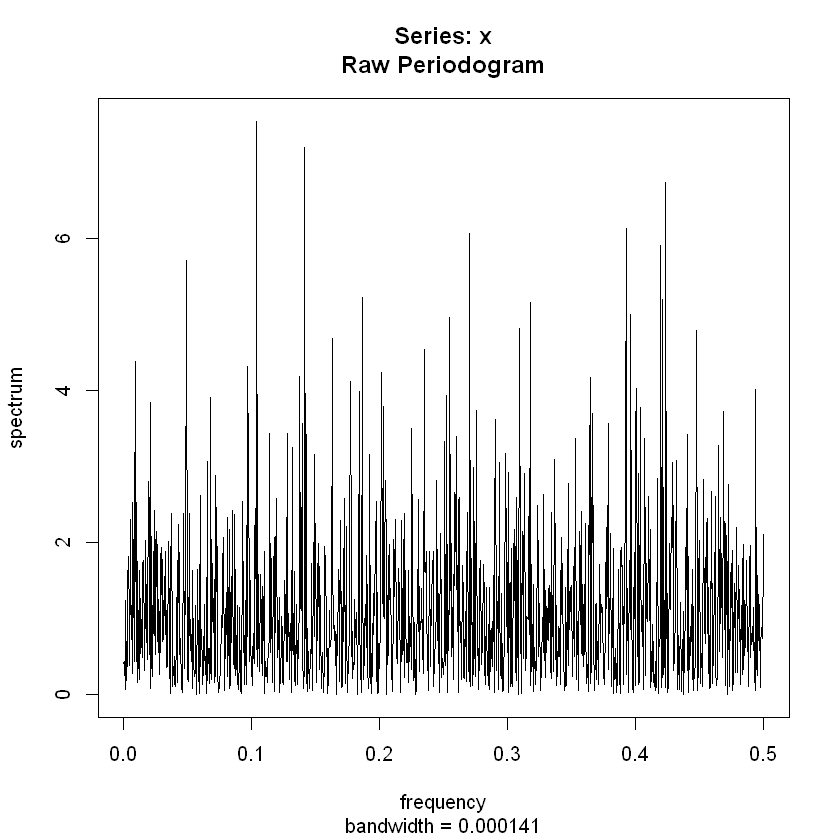

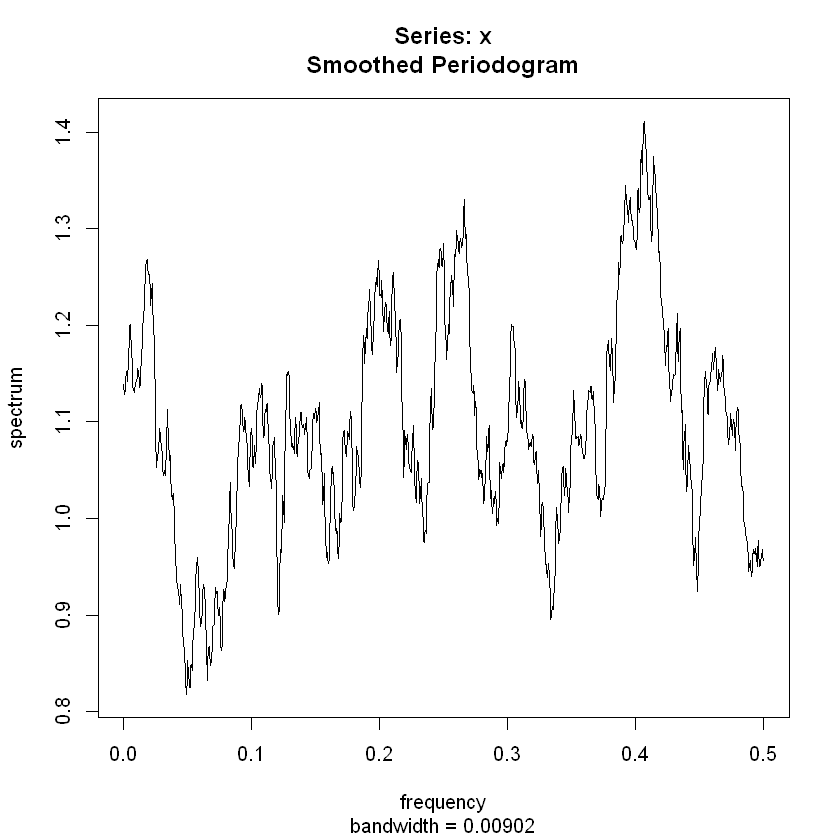

In [5]:
spectrum(x, log = c("no"))
spectrum(x, span = 65, log = c("no"))

The default is a logarithmic scale for the spectrum, but we have changed
this by setting the log parameter to "no". 

The frequency axis is cycles per sampling interval.


*The second spectrum is much smoother as a result of the moving average of 65 adjacent spikes*. Both spectra are scaled so that their area is one-half
the variance of the time series. 

# Exercise 2 Simulating AR(1): Positive coefficient
We generate a realisation of length 1024 from an AR(1) process with $\alpha$ equal
to 0.9 (meaning that we want to *simulate* an AR process, choosing arbitratily the coefficient) and compare the time series plot, correlogram, and spectrum

In [10]:
set.seed(1)
x <- w <- rnorm(1024)

alpha = 0.9
for (t in 2:1024) x[t]<- alpha * x[t-1] + w[t]


# Three plots in one layout
We plot the following:

* The timeseries;
* The ACF;
* The spectrum density

The 3 plots are joined in the same layout 

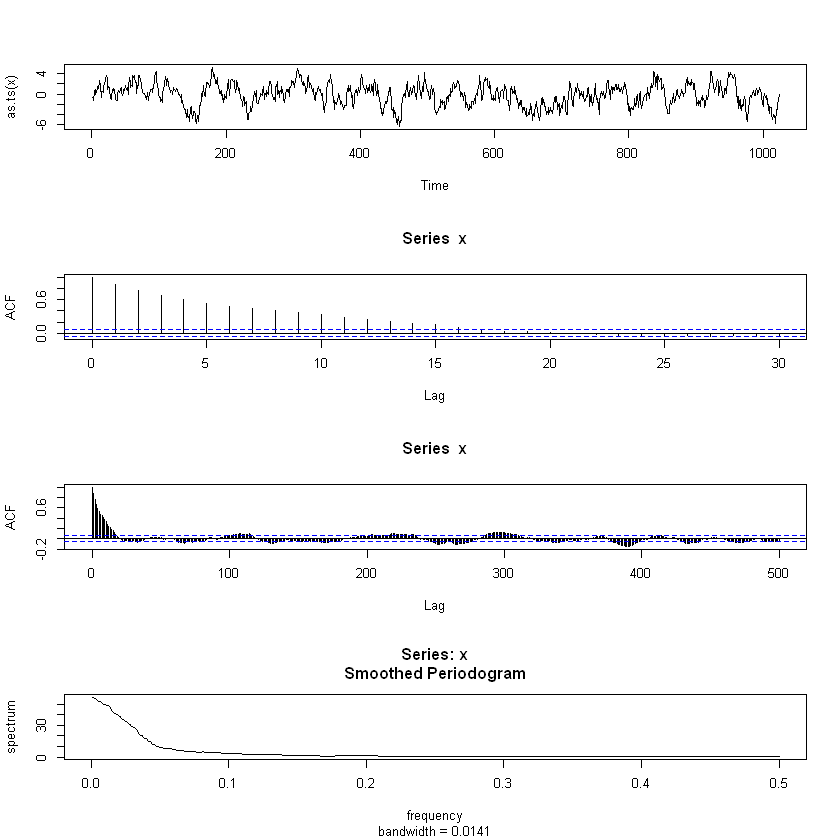

In [14]:
layout(1:4)

plot(as.ts(x))
acf(x)
acf(x, lag.max = 500)
spectrum(x, span = 51, log = c("no"))

# Simulating AR(1): Negative coefficient
We now change $\alpha$ from 0.9 to −0.9. 

The plot of the time series shows the tendency for **consecutive values to oscillate**, **change is rapid**, and we
expect the **spectrum** to pick up **high-frequency variation**. 

The acf quantifies the tendency for consecutive values to oscillate, and the spectrum shows high
frequency variation.

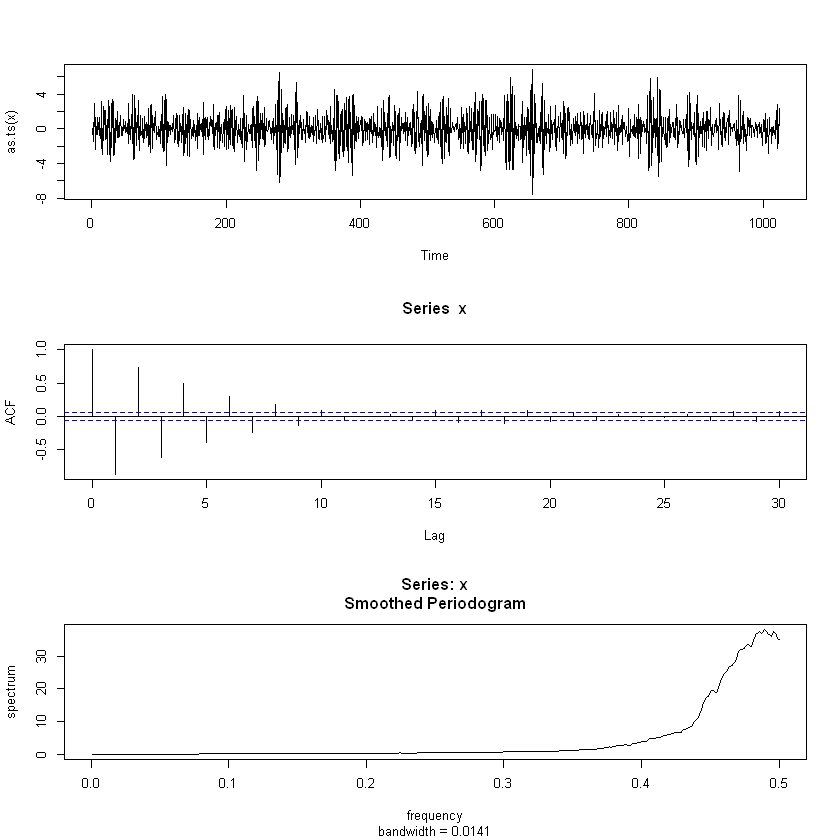

In [6]:
set.seed(1)
x <- w <- rnorm(1024)
for (t in 2:1024) x[t]<- -0.9 * x[t-1] + w[t]
layout(1:3)
plot(as.ts(x))
acf(x)
spectrum(x, span = 51, log = c("no"))

# Exercise 2 Simulate AR(2) A mass/spring system
Consider an AR(2) process with parameters 1 and −0.6. 

The spectrum  shows a peak at the natural frequency of the system – for example, the frequency at which **the mass
will oscillate if the spring is extended and then released**.

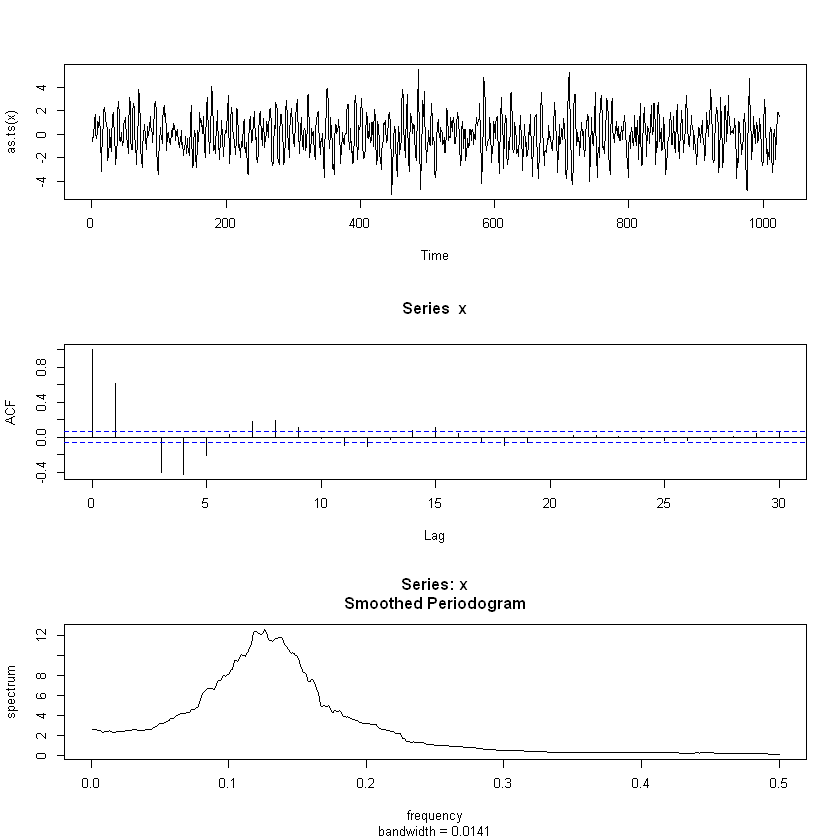

In [7]:
set.seed(1)
x <- w <- rnorm(1024)
for (t in 3:1024) x[t] <- x[t-1] - 0.6 * x[t-2] + w[t]
layout (1:3)
plot (as.ts(x))
acf (x)
spectrum (x, span = 51, log = c("no"))

# Exercise 3 Wave tank data
The data in the file wave.dat are the **surface height**, relative to **still water
level**, of **water at the centre of a wave tank** sampled over 39.6 seconds at a
rate of 10 samples per second. 

**The aim of the analysis is to check whether the spectrum is a realistic emulation of typical sea spectra. **

The time series plot gives a general impression of the wave profile over time
and we can see that there are no obvious erroneous values. 

The correlogram
is qualitatively similar to that for a realisation of an AR(2) process,6 but
an AR(2) model would not account for a second peak in the spectrum at a
frequency near 0.09.

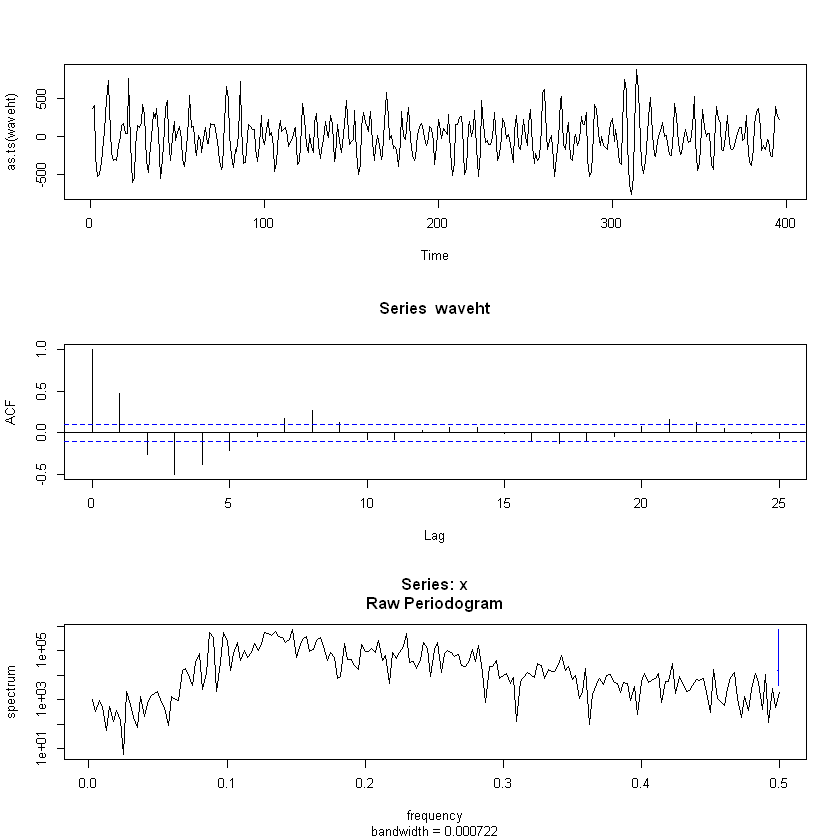

In [17]:
wavetank.dat <- read.table("C:/users/Enric/Downloads/wave.dat", header=T)
attach (wavetank.dat)
layout (1:3)
plot (as.ts(waveht))
acf (waveht)
spectrum (waveht)

## Spectral analysis and AR
It is possible to use the AR function to fit the spectrum used above (although we didn't do it). 

However, it is possible to see that AR(13) produces a better reprentation of the spectrum.

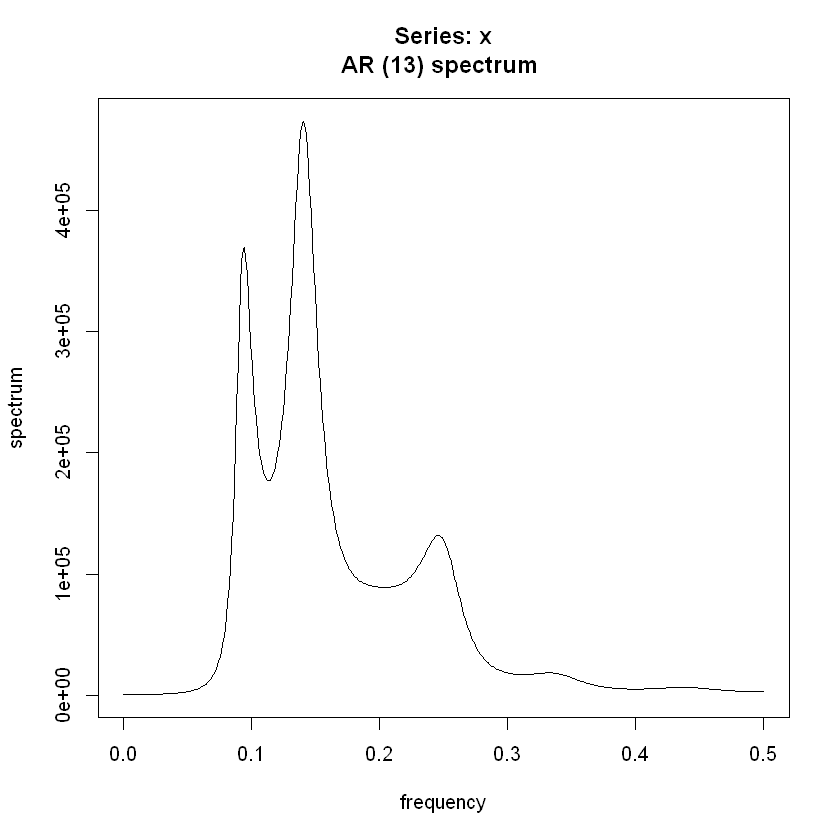

In [18]:
spectrum( waveht, log = c("no"), method = c("ar") )

# Exercise 4 Fault detection on electric motors

** Induction motors are widely used in industry, and although they are generally
reliable, they do require maintenance. **

A common fault is broken rotor bars, which reduce the output torque capability and increase vibration, and if left
undetected can lead to catastrophic failure of the electric motor. 

The measured current spectrum of a typical motor in good condition will have a spike at
mains frequency, commonly 50 Hz, with side band peaks at 46 Hz and 54 Hz.

**If a rotor bar breaks, the magnitude of the side band peaks will increase by a
factor of around 10. This increase can easily be detected in the spectrum.**


Siau et al. (2004) **compare current spectra for an induction motor in good
condition and with one broken bar**. 

They sample the current at 0.0025-second intervals and calculate spectra
from records of 100 seconds length. The time series have length 40,000,
and the bandwidth with a span of 60 is 1.2 Hz.




In [20]:
imotor.dat<- read.table("C:/users/Enric/Downloads/imotor.dat", header=T)
attach (imotor.dat)

head(imotor.dat)

The following objects are masked from imotor.dat (pos = 3):

    broken, good




,good,broken
,<dbl>,<dbl>
1,7481.09,7506.9
2,9986.47,10022.4
3,6640.17,6666.2
4,-592.85,-594.6
5,-7481.26,-7505.1
6,-9986.86,-10020.0


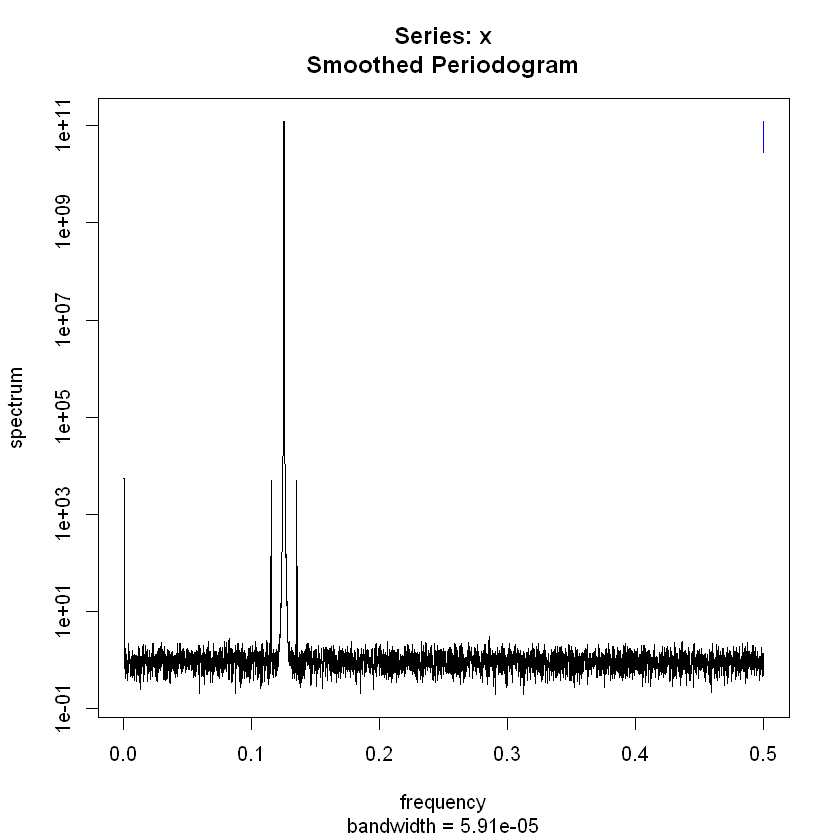

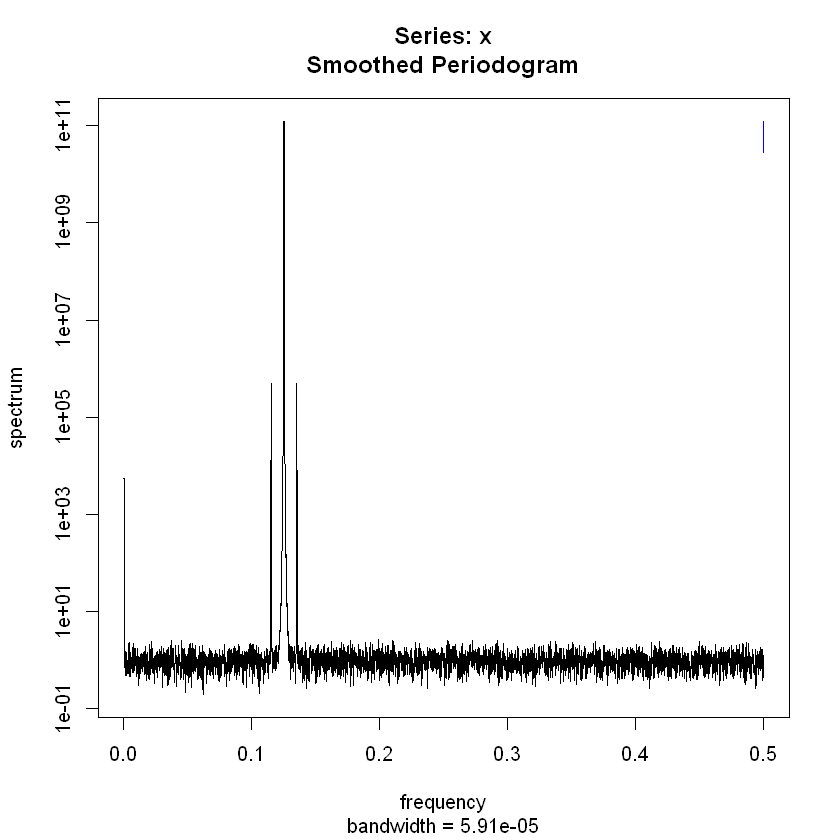

In [22]:
xg.spec <- spectrum(good, span = 9)
xb.spec <- spectrum(broken, span = 9)



In [23]:
freqg <- 400 * xg.spec$freq [4400:5600]
freqb <- 400 * xb.spec$freq [4400:5600]

The broken bar condition is indicated clearly by the higher side band peaks in the spectrum. In contrast, the standard deviations of the good condition and broken condition time series are very close.

[1] 7071.166

[1] 7071.191

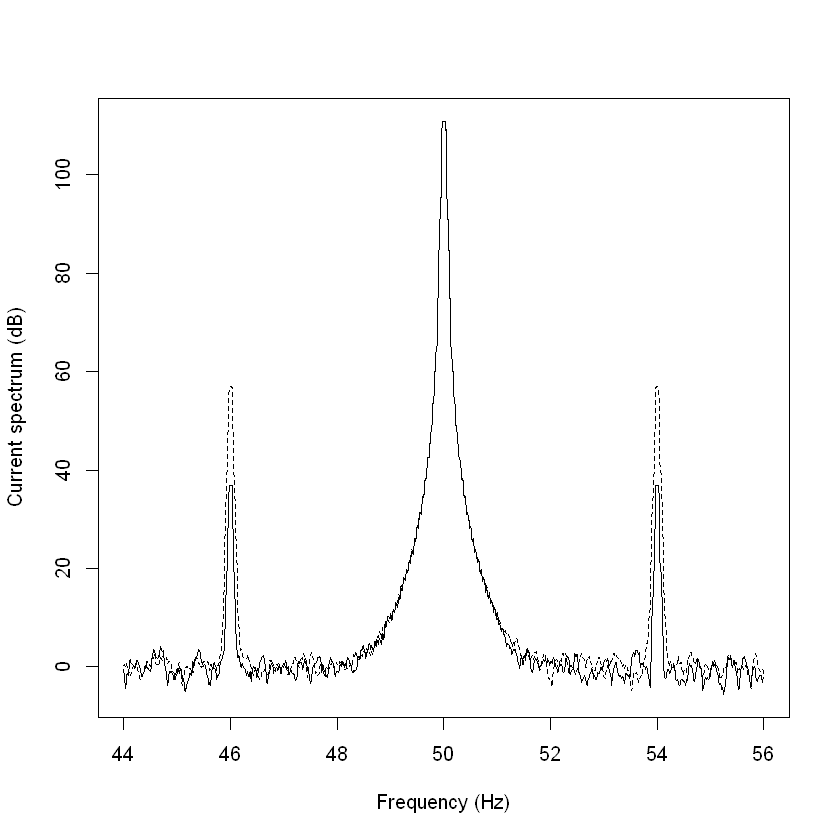

In [24]:
plot(freqg, 10*log10(xg.spec$spec[4400:5600]), main = "",
xlab = "Frequency (Hz)", ylab = "Current spectrum (dB)", type="l")
lines(freqb, 10 * log10(xb.spec$spec[4400:5600]), lty = "dashed")
sd(good)

sd(broken)

# Exercise 5 Climatic indices
Climatic indices are strongly related to ocean currents, which have a major
influence on weather patterns throughout the world. 

For example, El Nino is
associated with droughts throughout much of eastern Australia. 

A statistical
analysis of these indices is essential for two reasons. 

* Firstly, it helps us assess
evidence of **climate change**. 

* Secondly, it allows us **to forecast**, albeit with limited confidence, **potential natural disasters such as droughts** and to take
action to mitigate the effects. Farmers, in particular, will modify their plans
for crop planting if drought is more likely than usual. Spectral analysis enables
us to identify any tendencies towards periodicities or towards persistence in
these indices.

The **Southern Oscillation Index (SOI)** is defined as **the normalised pressure
difference between Tahiti and Darwin**. 

El Nino events occur when the SOI is
strongly negative, and are associated with droughts in eastern Australia. The
monthly time series8 from January 1866 until December 2006 are in soi.txt.
The time series plot is a useful check that the data have been
read correctly and gives a general impression of the range and variability of
the SOI. But, it is hard to discern any frequency information. 



In [26]:
soi.dat<- read.table("C:/users/Enric/Downloads/soi.dat", header=T)

attach (soi.dat)
head(soi.dat)

The following object is masked from soi.dat (pos = 3):

    SOI




,SOI
,<dbl>
1,-0.62
2,-0.12
3,-0.62
4,-0.65
5,0.04
6,-0.82


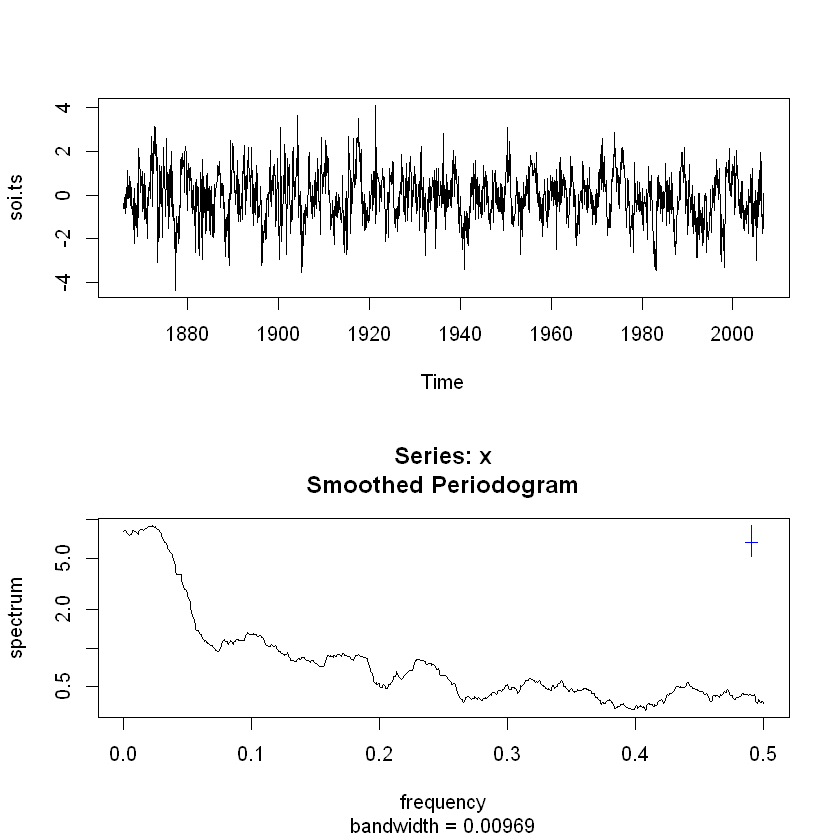

In [28]:
soi.ts <- ts(SOI, st = c(1866, 1), end = c(2006, 11), fr = 12)
layout (1:2)

plot (soi.ts)
soi.spec <- spectrum( SOI, span = sqrt(2 * length(SOI)) )
